In [46]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('creditcard.csv')

Text(0, 0.5, 'Frequency')

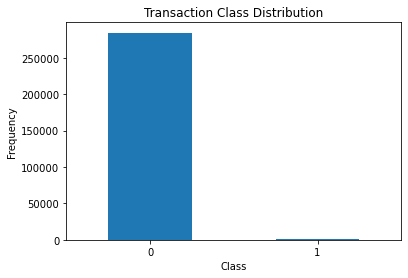

In [47]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [48]:
fraud = df[df['Class']==1]
normal = df[df['Class']==0]

In [49]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [50]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [51]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [52]:
## Independent and dependent features
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

### Cross Validation: KFold and Hyperparameter Technique: GridSearchCV

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [54]:
log_class = LogisticRegression()
grid = {'C': 10.0 ** np.arange(-2, 3), 'penalty': ['l1', 'l2']}
cv = KFold(n_splits=5, shuffle=False, random_state=None)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [56]:
clf = GridSearchCV(log_class, grid, cv=cv, n_jobs=-1, scoring='f1_macro')
clf.fit(X_train, y_train)

C:\Users\dhane\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dhane\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dhane\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\dhane\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logisti

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [57]:
prediction = clf.predict(X_test)
print(confusion_matrix(y_test, prediction))
print(accuracy_score(y_test, prediction))
print(classification_report(y_test, prediction))

[[56828    25]
 [   27    82]]
0.9990871107053826
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56853
           1       0.77      0.75      0.76       109

    accuracy                           1.00     56962
   macro avg       0.88      0.88      0.88     56962
weighted avg       1.00      1.00      1.00     56962



In [58]:
class_weight = dict({0: 1, 1: 100})

In [59]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(class_weight=class_weight)
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 100})

In [60]:
prediction = clf.predict(X_test)
print(confusion_matrix(y_test, prediction))
print(accuracy_score(y_test, prediction))
print(classification_report(y_test, prediction))

[[56851     2]
 [   16    93]]
0.9996839998595555
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56853
           1       0.98      0.85      0.91       109

    accuracy                           1.00     56962
   macro avg       0.99      0.93      0.96     56962
weighted avg       1.00      1.00      1.00     56962



### Under Sampling

In [61]:
from imblearn.under_sampling import NearMiss
from collections import Counter

In [62]:
ns = NearMiss(0.8)
X_train_ns, y_train_ns = ns.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

C:\Users\dhane\anaconda3\envs\py3-TF2.0\lib\site-packages\imblearn\utils\_validation.py:590: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


The number of classes before fit Counter({0: 227462, 1: 383})
The number of classes after fit Counter({0: 478, 1: 383})


In [63]:
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 227462, 1: 383})
The number of classes after fit Counter({0: 478, 1: 383})


In [64]:
y_train_ns.value_counts()

0    478
1    383
Name: Class, dtype: int64

In [65]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train_ns, y_train_ns)

RandomForestClassifier()

In [66]:
prediction = clf.predict(X_test)
print(confusion_matrix(y_test, prediction))
print(accuracy_score(y_test, prediction))
print(classification_report(y_test, prediction))

[[37739 19114]
 [    9   100]]
0.6642849619044275
              precision    recall  f1-score   support

           0       1.00      0.66      0.80     56853
           1       0.01      0.92      0.01       109

    accuracy                           0.66     56962
   macro avg       0.50      0.79      0.40     56962
weighted avg       1.00      0.66      0.80     56962



### Over Sampling

In [67]:
from imblearn.over_sampling import RandomOverSampler

In [68]:
os = RandomOverSampler(0.5)
X_train_os, y_train_os = os.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_os)))

C:\Users\dhane\anaconda3\envs\py3-TF2.0\lib\site-packages\imblearn\utils\_validation.py:590: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


The number of classes before fit Counter({0: 227462, 1: 383})
The number of classes after fit Counter({0: 227462, 1: 113731})


In [69]:
y_train_os.value_counts()

0    227462
1    113731
Name: Class, dtype: int64

In [70]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train_os, y_train_os)

RandomForestClassifier()

In [71]:
prediction = clf.predict(X_test)
print(confusion_matrix(y_test, prediction))
print(accuracy_score(y_test, prediction))
print(classification_report(y_test, prediction))

[[56850     3]
 [   16    93]]
0.9996664442961974
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56853
           1       0.97      0.85      0.91       109

    accuracy                           1.00     56962
   macro avg       0.98      0.93      0.95     56962
weighted avg       1.00      1.00      1.00     56962



### SMOTETomek

In [72]:
from imblearn.combine import SMOTETomek

In [ ]:
os = SMOTETomek(0.5)
X_train_os, y_train_os = os.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_os)))

C:\Users\dhane\anaconda3\envs\py3-TF2.0\lib\site-packages\imblearn\utils\_validation.py:590: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train_os, y_train_os)

In [ ]:
prediction = clf.predict(X_test)
print(confusion_matrix(y_test, prediction))
print(accuracy_score(y_test, prediction))
print(classification_report(y_test, prediction))

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7) 
knn.fit(X_train, y_train)

In [ ]:
y_pred_knn=knn.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred_knn))
print(accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred_gnb))
print(accuracy_score(y_test, y_pred_gnb))
print(classification_report(y_test, y_pred_gnb))

In [ ]:
y_pred_gnb

## XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred_xgb))
print(accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

## Isolation forest

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
#Determine the number of fraud and valid transactions in the dataset
outlier_fraction = len(fraud)/float(len(normal))
state = np.random.RandomState(42)

In [ ]:
##Define the outlier detection methods

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=state, verbose=0),
}

In [ ]:
clf=IsolationForest(n_estimators=100, max_samples=len(X),contamination=outlier_fraction,random_state=state, verbose=0)
clf.fit(X)
scores_prediction = clf.decision_function(X)
y_pred = clf.predict(X_test)
#Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
n_errors = (y_pred != y_test).sum()
# Run Classification Metrics
print("No of errors in IF ",n_errors)
print("Accuracy Score :")
print(accuracy_score(y_test,y_pred))
print("Classification Report :")
print(classification_report(y_test,y_pred))